`pandas` is named after "panel data", which is a term in econometrics for data that has multiple people over multiple periods of time. `pandas` is great for data manipulation: it's like a Excel (pivot table) and SQL (filter rows/create new columns/GROUP BY/JOIN) and Quicksight (make plots) all in 1 tool!

`pandas` is built on `numpy`, which allows you to create matrixes. `numpy` is written in C, so it's fast. But the most important thing is `numpy` allows vectorized calculations. What that means is that you don't do for-loops in `numpy`/`pandas`. You do calculations on all pieces of data with the code. In real life, most of the time, you will use `pandas` and not actually deal with `numpy`.

Geek note: vectorized calculations are much faster than for-loops in Python because a) `numpy` is running in C (instead of Python) and b) `numpy` is running under strict assumptions that allow optimization.  
Another geek note: `numpy` does vectorization using SIMD: Single Instruction, Multiple Data

In [1]:
# for loop: add 1
lst = [1, 2, 3]
print([ele + 1 for ele in lst])

[2, 3, 4]


In [2]:
# vectorized calculation in numpy
import numpy as np

arr = np.array([1, 2, 3])
print(arr + 1)

[2 3 4]


In [3]:
# vectorized calculation in pandas
import pandas as pd

ser = pd.Series([1, 2, 3])
print(ser.apply(lambda ele: ele + 1))

0    2
1    3
2    4
dtype: int64


### Filtering data with numpy and pandas looks familiar.

In [4]:
mat = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
mat

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [5]:
mat[1:]  # rows 1 + 2

array([[4, 5, 6],
       [7, 8, 9]])

In [6]:
mat[:, 1:]  # columns 1 + 2

array([[2, 3],
       [5, 6],
       [8, 9]])

In [7]:
mat[1:, 1:]  # slicing data more specifically

array([[5, 6],
       [8, 9]])

In [8]:
df_person = pd.DataFrame({"name": ["Alice", "Bob", "Carol"], "age": [20, 30, 40], "gender": ["F", "M", "F"]})
df_person

,name,age,gender
0,Alice,20,F
1,Bob,30,M
2,Carol,40,F


In [9]:
df_person[1:]  # rows 1 + 2

,name,age,gender
1,Bob,30,M
2,Carol,40,F


In [10]:
df_person.iloc[:, 1:]  # columns 1 + 2

,age,gender
0,20,F
1,30,M
2,40,F


In [11]:
df_person.iloc[1:, 1:]  # slicing data more specifically

,age,gender
1,30,M
2,40,F


In [12]:
df_person.loc[:, "age"]  # use `loc` to mention column by name and `iloc` to get column by index

0    20
1    30
2    40
Name: age, dtype: int64

In [13]:
df_person["age"]  # 1 bracket gets the pandas Series, only works for 1 column

0    20
1    30
2    40
Name: age, dtype: int64

In [14]:
df_person[["age"]]  # 2 brackets get the pandas DataFrame, works for 1 or more columns

,age
0,20
1,30
2,40


### pandas has 2 main classes: DataFrame and Series

In [15]:
df_person  # DataFrame: 2 dimensional data

,name,age,gender
0,Alice,20,F
1,Bob,30,M
2,Carol,40,F


In [16]:
df_person["name"]  # Series: 1 dimensional data

0    Alice
1      Bob
2    Carol
Name: name, dtype: object

### Some info about the dataframe

In [17]:
df_person.dtypes  # object means string

name      object
age        int64
gender    object
dtype: object

In [18]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      int64 
 2   gender  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [19]:
df_person.describe()

,age
count,3.0
mean,30.0
std,10.0
min,20.0
25%,25.0
50%,30.0
75%,35.0
max,40.0


### Most of the time, you use pandas for math but it has support for string columns

In [20]:
df_person["name"].str.upper()  # .lower(), .replace(), strip(), .count(), isdigit(), etc like regular string methods

0    ALICE
1      BOB
2    CAROL
Name: name, dtype: object

### pandas: like Excel's pivot table or SQL's GROUP BY

In [21]:
df_orders = pd.DataFrame({
    "name": ["Alice", "Alice", "Bob"],
    "item": ["dress", "shoes", "video game"],
    "price": [40, 50, 60]},
)
df_orders

,name,item,price
0,Alice,dress,40
1,Alice,shoes,50
2,Bob,video game,60


In [22]:
df_orders["name"].value_counts()
# equivalent to:
# SELECT name, COUNT(*)
# FROM table
# GROUP BY name

name
Alice    2
Bob      1
Name: count, dtype: int64

In [23]:
df_orders.groupby("name")[["price"]].sum().reset_index()
# equivalent to:
# SELECT name, SUM(price) as price
# FROM table
# GROUP BY name

,name,price
0,Alice,90
1,Bob,60


Also `pandas` allows you to do fancier (ie any computation) on the aggregations. So this is more powerful than Excel or SQL. You can use custom aggregation functions to emulate window functions in SQL. If you need any help, feel free to ask me.

### JOIN
In practice, I don't JOIN dataframes often, but it is possible.

In [24]:
pd.DataFrame.merge(df_person, df_orders, on="name", how="left")  # .join() does something else, which is counterinuitive and annoying
# df_person.merge(df_orders, on="name", how="left")  # also works

# also note for the `price` column, whenever you have a NaN/Null, then a numeric column becomes a float column

,name,age,gender,item,price
0,Alice,20,F,dress,40.0
1,Alice,20,F,shoes,50.0
2,Bob,30,M,video game,60.0
3,Carol,40,F,NaN,NaN


In [25]:
df_person.merge(df_orders, on="name", how="right")  # notice last row is dropped

,name,age,gender,item,price
0,Alice,20,F,dress,40
1,Alice,20,F,shoes,50
2,Bob,30,M,video game,60


### Combining 2 dataframes together

In [26]:
pd.concat([df_person, df_person], axis=0)

,name,age,gender
0,Alice,20,F
1,Bob,30,M
2,Carol,40,F
0,Alice,20,F
1,Bob,30,M
2,Carol,40,F


In [27]:
pd.concat([df_person, df_person], axis=1)  # notice the difference

,name,age,gender,name,age,gender
0,Alice,20,F,Alice,20,F
1,Bob,30,M,Bob,30,M
2,Carol,40,F,Carol,40,F


### Compare DataFrames

In [28]:
df_person_modified = df_person.copy()
df_person_modified.loc[0, "gender"] = "M"
df_person_modified

,name,age,gender
0,Alice,20,M
1,Bob,30,M
2,Carol,40,F


In [29]:
df_person == df_person_modified  # element-wise comparison

,name,age,gender
0,True,True,False
1,True,True,True
2,True,True,True


In [30]:
(df_person == df_person_modified).all()  # column-wise comparison

name       True
age        True
gender    False
dtype: bool

In [31]:
pd.DataFrame.equals(df_person, df_person_modified)  # entire dataframe comparison

False

### Sort dataframe (like ORDER BY)

In [32]:
df_person.sort_values("age")  # equivalent to ORDER BY age

,name,age,gender
0,Alice,20,F
1,Bob,30,M
2,Carol,40,F


In [33]:
df_person.sort_values("age", ascending=False)  # equivalent to ORDER BY age DESC

,name,age,gender
2,Carol,40,F
1,Bob,30,M
0,Alice,20,F


In [34]:
df_person.sort_values("age", ascending=False).reset_index(drop=True)  # make the index look normal again

,name,age,gender
0,Carol,40,F
1,Bob,30,M
2,Alice,20,F


### Plot (like Quicksight)
`pandas` uses `matplotlib` to plot.

<Axes: >

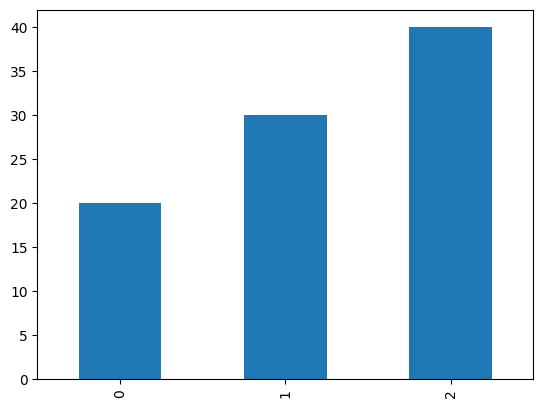

In [35]:
df_person["age"].plot(kind="bar")

<Axes: >

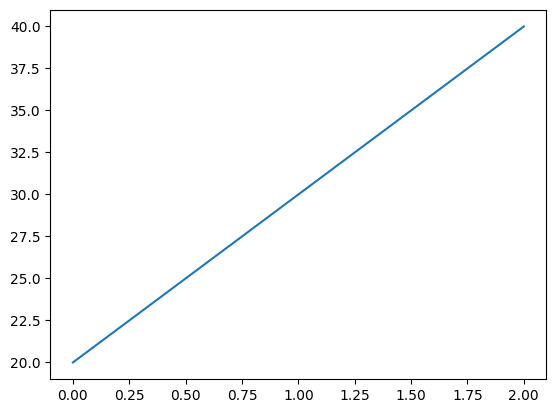

In [36]:
df_person["age"].plot(kind="line")

<Axes: ylabel='Frequency'>

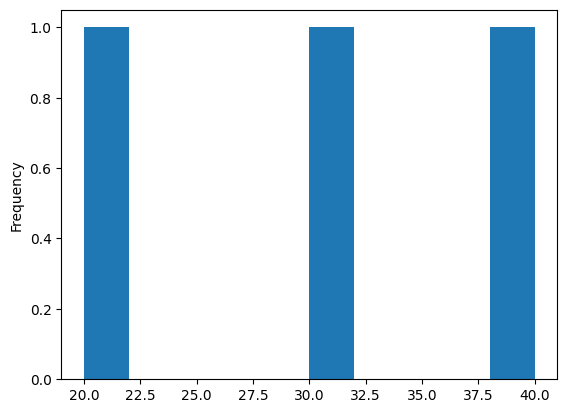

In [37]:
df_person["age"].plot(kind="hist")

<Axes: xlabel='name'>

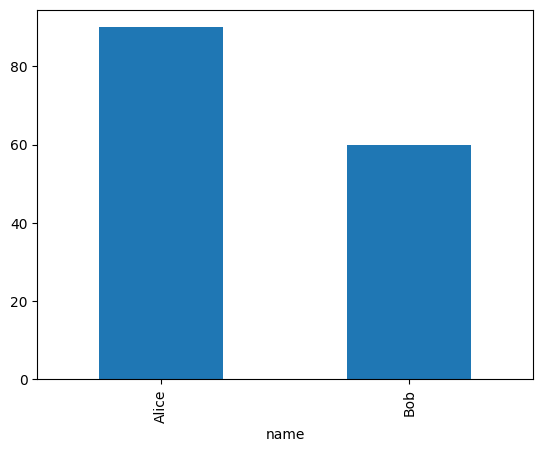

In [38]:
df_orders.groupby("name")["price"].sum().plot(kind="bar")

### Styler (relatively new feature)
Works like Excel highlighting a cell

In [39]:
df_orders.style.background_gradient(cmap='viridis')

,name,item,price
0,Alice,dress,40
1,Alice,shoes,50
2,Bob,video game,60


In [40]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color


df = pd.DataFrame(np.random.randn(10, 10))
(
    df.style
    .applymap(color_negative_red)  # applymap occurs for each element
    .apply(highlight_max) # apply by default works at the column level
)

,0,1,2,3,4,5,6,7,8,9
0,0.274645,0.054195,1.184974,0.657261,0.751485,0.608267,-1.149277,1.050883,0.341560,-0.771603
1,1.148414,-0.073854,-0.276243,1.613408,-0.499394,1.685214,1.290909,1.562130,0.487491,-0.296158
2,-1.129029,-0.400098,-0.027120,-0.720439,-0.028992,-0.120018,0.235700,0.106658,-1.461035,-1.430854
3,0.615867,-0.612678,-0.249385,0.618866,-0.702845,1.394732,-0.500624,-1.038793,-2.011865,0.037732
4,-0.211569,1.537246,0.253789,1.865654,-1.110330,0.437503,-2.162544,-1.108017,-1.850603,-1.979469
5,0.095074,-1.006410,-0.006899,1.615863,-0.473912,-1.799691,1.000731,0.667075,-0.619511,-0.202279
6,0.608915,1.070560,0.987439,-1.515895,1.230456,-0.706110,0.964794,-1.397953,1.302265,0.166506
7,-0.289311,-0.461194,0.170419,-0.420983,-1.334689,0.713710,-0.289153,0.009787,-0.167900,-0.451710
8,-0.000607,0.700656,-0.061327,0.708940,0.042656,1.340283,1.303150,-0.172068,0.123950,-0.061139
9,-0.523114,-0.435326,0.990736,0.712194,-1.249389,-0.693146,0.279789,-0.240840,-1.364430,1.029431


In [41]:
(
    df.style
    .applymap(color_negative_red)  # applymap occurs for each element
    .apply(highlight_max, axis=1) # apply with `axis=1` works at the row level
)

,0,1,2,3,4,5,6,7,8,9
0,0.274645,0.054195,1.184974,0.657261,0.751485,0.608267,-1.149277,1.050883,0.341560,-0.771603
1,1.148414,-0.073854,-0.276243,1.613408,-0.499394,1.685214,1.290909,1.562130,0.487491,-0.296158
2,-1.129029,-0.400098,-0.027120,-0.720439,-0.028992,-0.120018,0.235700,0.106658,-1.461035,-1.430854
3,0.615867,-0.612678,-0.249385,0.618866,-0.702845,1.394732,-0.500624,-1.038793,-2.011865,0.037732
4,-0.211569,1.537246,0.253789,1.865654,-1.110330,0.437503,-2.162544,-1.108017,-1.850603,-1.979469
5,0.095074,-1.006410,-0.006899,1.615863,-0.473912,-1.799691,1.000731,0.667075,-0.619511,-0.202279
6,0.608915,1.070560,0.987439,-1.515895,1.230456,-0.706110,0.964794,-1.397953,1.302265,0.166506
7,-0.289311,-0.461194,0.170419,-0.420983,-1.334689,0.713710,-0.289153,0.009787,-0.167900,-0.451710
8,-0.000607,0.700656,-0.061327,0.708940,0.042656,1.340283,1.303150,-0.172068,0.123950,-0.061139
9,-0.523114,-0.435326,0.990736,0.712194,-1.249389,-0.693146,0.279789,-0.240840,-1.364430,1.029431
